see README.md

Dominant frequency
0.018518518518518517
Spectrum Index
20
Dominant frequency Optimized
0.018427528420449285


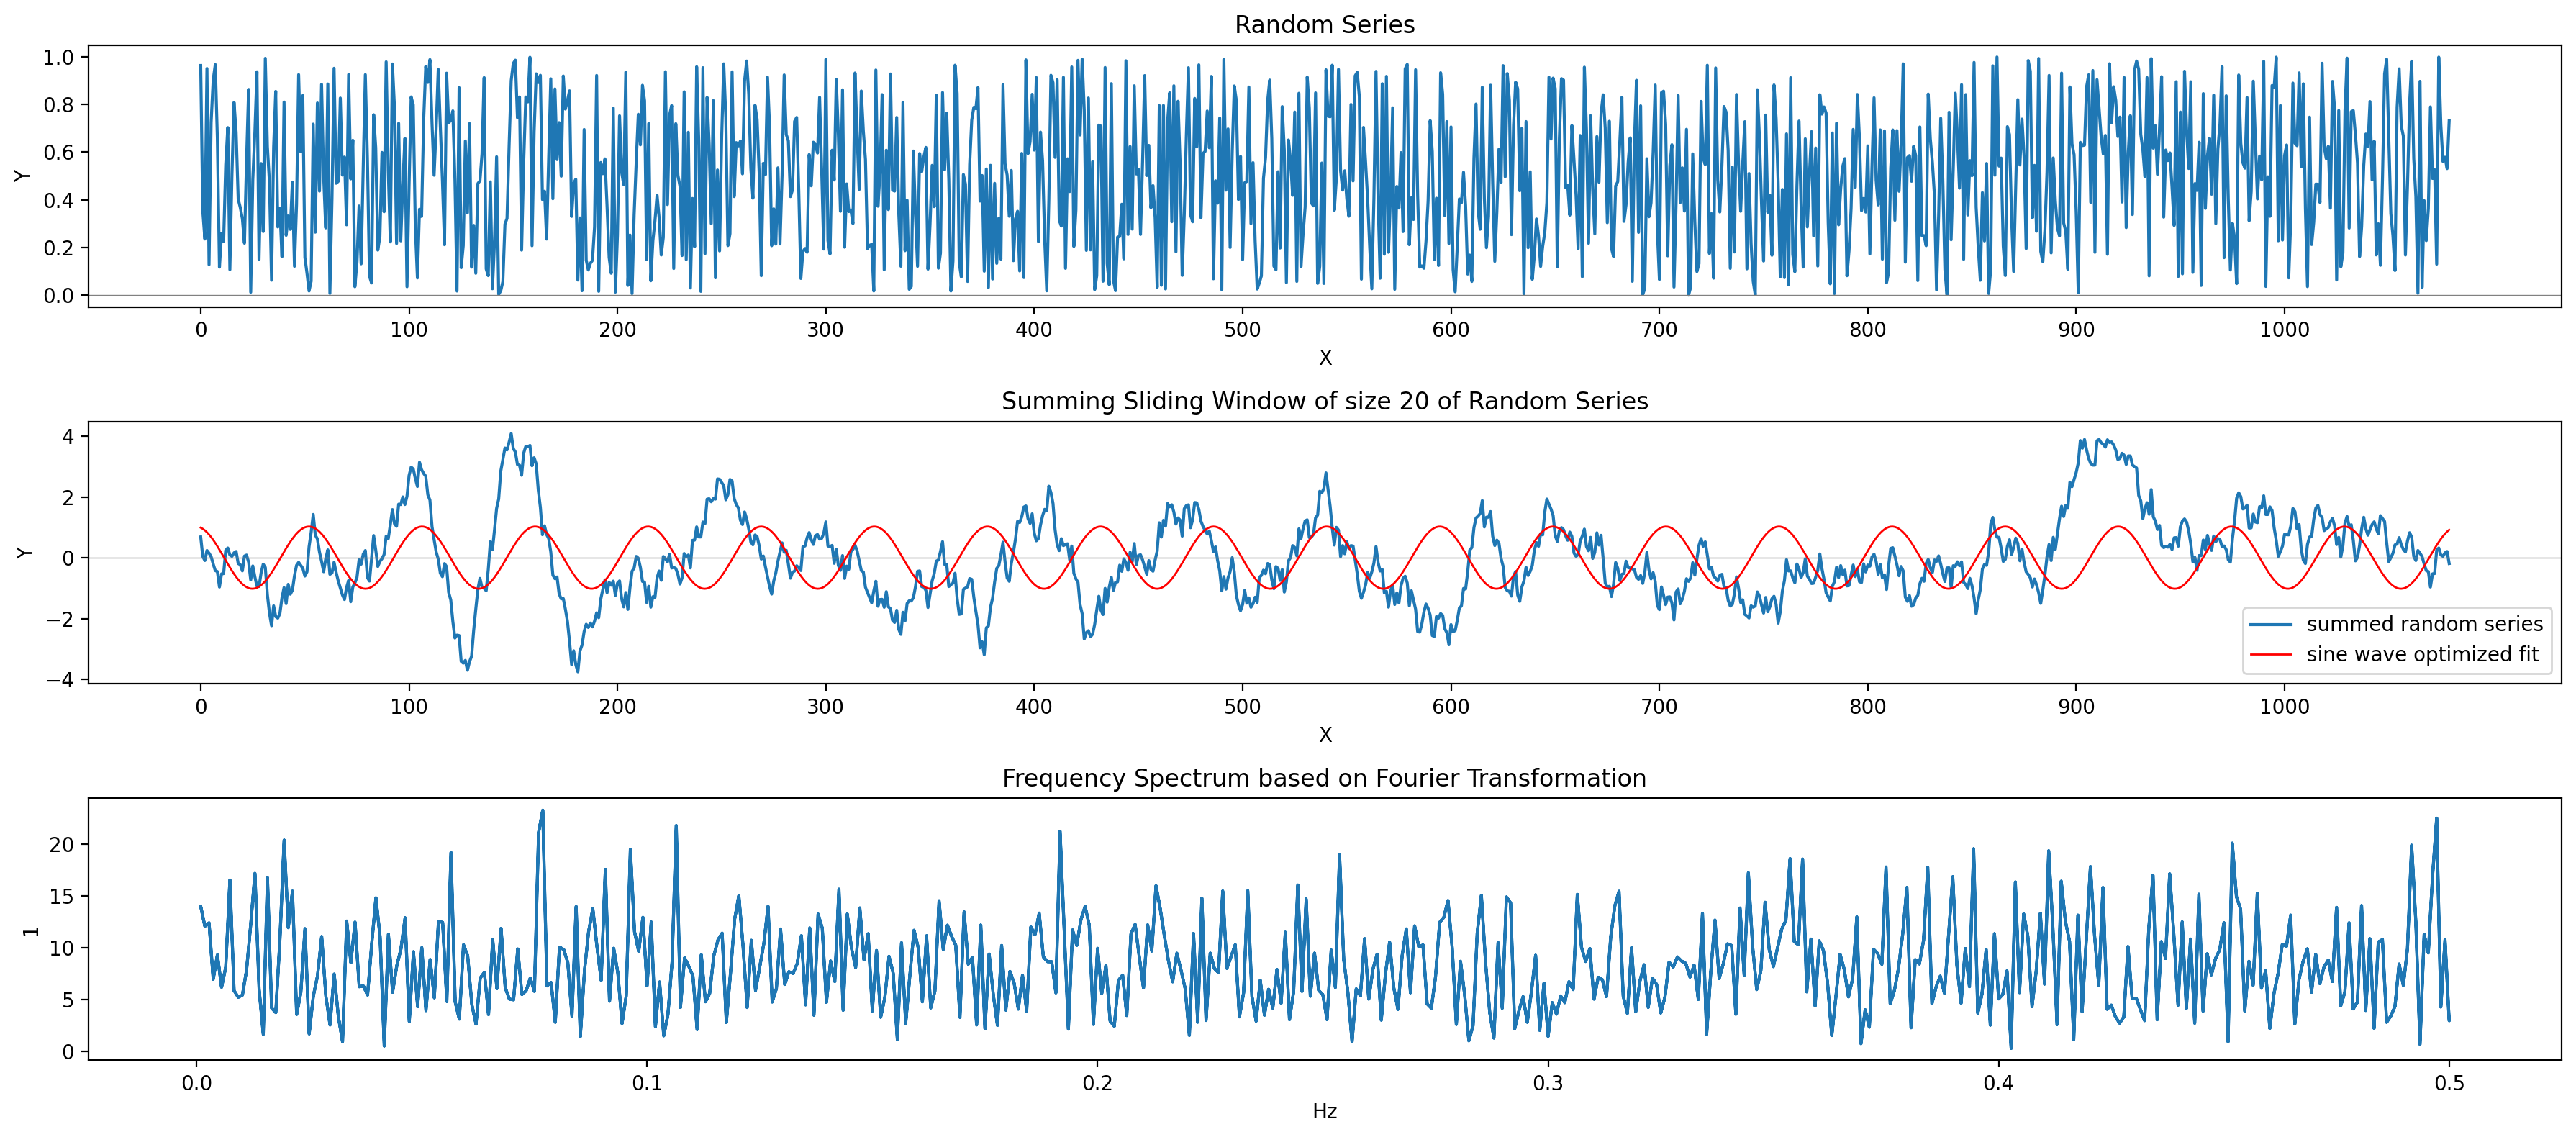

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.optimize
import sys

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

np.set_printoptions(threshold=sys.maxsize)

# np.random.seed(98)

samping_frequency = 1
samples = 360 * 3 * samping_frequency

xs = np.arange(samples)

## Random signal
ys = np.random.rand(1, samples)
ys = ys[0]

## Test signal
# frequency = 0.01
# ys = np.sin(2. * np.pi * frequency * xs / samping_frequency) # + np.cos(4. * np.pi * frequency * xs)

window_size = 20
ys_transformed = np.convolve(ys, np.ones(window_size, dtype=float), 'valid') # Sliding window
ys_transformed = np.resize(ys_transformed, samples)
# ys = ys / ys.max() # Rebase to 0..1

fit_amp = np.std(ys_transformed) * 2.**0.5

offset = ys_transformed.mean()
#offset = 0

fft_fre = np.fft.fftfreq(n=xs.size, d=1/samping_frequency)
fft_res = np.fft.fft(ys)

freq_band_sub_section_range = int(len(fft_res) / 15)
dominant_freq = abs(fft_fre[np.argmax(np.abs(fft_res[1:freq_band_sub_section_range]))])
print("Dominant frequency")
print(dominant_freq)
print("Spectrum Index")
print(np.argmax(np.abs(fft_res[1:freq_band_sub_section_range])))

# fft_res_sorted = np.sort(abs(fft_res))
# print(abs(fft_res_sorted))

plt.subplots(figsize=(18,8))
plt.subplot(3,1,1)
plt.plot(xs, ys)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f'Random Series')
plt.xticks(np.arange(min(xs), max(xs)+1, 100.0 * samping_frequency))
plt.axhline(linewidth=0.5, color='gray')

plt.subplot(3,1,2)
transformed_plot = plt.plot(xs, ys_transformed - offset, label="summed random series")
plt.axhline(linewidth=0.5, color='gray')

fit = fit_amp * np.sin(2. * np.pi * dominant_freq * xs / samping_frequency)

guess = np.array([fit_amp, 2.*np.pi*dominant_freq, 0., offset])
def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
popt, pcov = scipy.optimize.curve_fit(sinfunc, xs, ys, p0=guess)
A, w, p, c = popt

fit_opt = 50 * A * np.sin(w*xs + p) + c

print("Dominant frequency Optimized")
print(w / (2. *  np.pi))

offset_fit = fit.mean()
offset_fit_opt = fit_opt.mean()
fit = fit - offset_fit
fit_opt = fit_opt - offset_fit_opt

# A fit just based on the found frequqncy
# fit_plot = plt.plot(xs, fit, "y-", label="sine wave fit", linewidth=1)
# An optimized fit
fit_opt_plot = plt.plot(xs, fit_opt, "r-", label="sine wave optimized fit", linewidth=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f'Summing Sliding Window of size {window_size} of Random Series')
plt.xticks(np.arange(min(xs), max(xs)+1, 100.0 * samping_frequency))

# # plt.ylim(-0.5, 0.5)
# fig_size = plt.rcParams["figure.figsize"] # Get current size
# fig_size[0] = 25                          # Set figure width to 12 and height to 9
# fig_size[1] = 8
# plt.rcParams["figure.figsize"] = fig_size
plt.legend()

plt.subplot(3,1,3)
plt.plot(abs(fft_fre[1:]), np.abs(fft_res[1:]))
plt.title("Frequency Spectrum based on Fourier Transformation")
plt.xlabel("Hz")
plt.ylabel("1")

plt.tight_layout()
plt.show()
